In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [9]:
import sys
sys.path.insert(1, '../')

from src import analysis

# Enable module reloading
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
single_col = analysis.SingleColAnalyser()

## Books

In [70]:
books = pd.read_csv('../data/books.csv')

In [71]:
books.head(3)

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,NaN,1,['147734'],US,NaN,"[{'count': '1057', 'name': 'to-read'}, {'count...",B0056A00P4,True,4.04,B0056A00P4,"['519546', '1295074', '21407416']",This is the final tale in the bestselling auth...,NaN,https://www.goodreads.com/book/show/12182387-t...,"[{'author_id': '50873', 'role': ''}, {'author_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/12182387-t...,https://s.gr-assets.com/assets/nophoto/book/11...,12182387,4,285263,"The Passion (Dark Visions, #3)","The Passion (Dark Visions, #3)"
1,NaN,2,['425995'],US,NaN,"[{'count': '1010', 'name': 'to-read'}, {'count...",B006KLYIAG,True,3.80,B006KLYIAG,"['13400912', '13327517', '18107102', '15797097...",Life should be simple for Cassie.\nFor the sma...,NaN,https://www.goodreads.com/book/show/20135365-h...,"[{'author_id': '5395324', 'role': ''}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.goodreads.com/book/show/20135365-h...,https://s.gr-assets.com/assets/nophoto/book/11...,20135365,5,18450480,Hope's Daughter,Hope's Daughter
2,0698143760,17,['493993'],US,NaN,"[{'count': '1799', 'name': 'fantasy'}, {'count...",NaN,True,3.80,NaN,"['15728807', '17182499', '15673520', '16081758...",Wanted by no one.\nHunted by everyone.\nSixtee...,ebook,https://www.goodreads.com/book/show/21401181-h...,"[{'author_id': '7314532', 'role': ''}]",Viking Children's,416.0,4.0,9780698143760,3.0,NaN,2014.0,https://www.goodreads.com/book/show/21401181-h...,https://images.gr-assets.com/books/1394747643m...,21401181,33,24802827,"Half Bad (Half Life, #1)","Half Bad (Half Life, #1)"


In [10]:
books.describe(include='all')

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
count,55555,93398.000000,93398,93398,63766,93398,17332,93398,93398.000000,45247,93398,89108,75389,93398,93398,74798,71695.000000,64937.000000,66580,71315.000000,7390,77895.000000,93398,93398,9.339800e+04,9.339800e+04,9.339800e+04,93398,93398
unique,55555,NaN,16885,1,73,44704,17332,2,NaN,23383,22069,70278,159,93398,25259,10257,NaN,NaN,66580,NaN,1905,NaN,93398,68495,NaN,NaN,NaN,55848,55848
top,0553497790,NaN,[],US,eng,"[{'count': '51038', 'name': 'favorites'}, {'co...",B01EKGW0K2,False,NaN,B00AI5AQPQ,[],<>,Paperback,https://www.goodreads.com/book/show/23499627-t...,"[{'author_id': '15872', 'role': ''}]",Simon Pulse,NaN,NaN,9781250136114,NaN,Unabridged,NaN,https://www.goodreads.com/book/show/23499627-t...,https://s.gr-assets.com/assets/nophoto/book/11...,NaN,NaN,NaN,Matilda,Matilda
freq,1,NaN,38758,93398,35989,65,1,65575,NaN,35,16580,24,35946,1,415,1740,NaN,NaN,1,NaN,539,NaN,1,24904,NaN,NaN,NaN,73,73
mean,NaN,101.913189,NaN,NaN,NaN,NaN,NaN,NaN,3.860503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.943539,12.538907,NaN,6.330323,NaN,2010.706104,NaN,NaN,1.682098e+07,1.351242e+03,2.023518e+07,NaN,NaN
std,NaN,1159.965407,NaN,NaN,NaN,NaN,NaN,NaN,0.345687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.386195,9.648199,NaN,3.310877,NaN,96.504383,NaN,NaN,9.993895e+06,2.885759e+04,1.688406e+07,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,2.000000,NaN,NaN,5.000000e+01,0.000000e+00,6.200000e+01,NaN,NaN
25%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.000000,3.000000,NaN,4.000000,NaN,2010.000000,NaN,NaN,8.887362e+06,1.500000e+01,3.600396e+06,NaN,NaN
50%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.000000,11.000000,NaN,6.000000,NaN,2012.000000,NaN,NaN,1.733140e+07,4.800000e+01,1.750882e+07,NaN,NaN
75%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.000000,21.000000,NaN,9.000000,NaN,2015.000000,NaN,NaN,2.483025e+07,1.840000e+02,2.766992e+07,NaN,NaN


In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93398 entries, 0 to 93397
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn                  55555 non-null  object 
 1   text_reviews_count    93398 non-null  int64  
 2   series                93398 non-null  object 
 3   country_code          93398 non-null  object 
 4   language_code         63766 non-null  object 
 5   popular_shelves       93398 non-null  object 
 6   asin                  17332 non-null  object 
 7   is_ebook              93398 non-null  bool   
 8   average_rating        93398 non-null  float64
 9   kindle_asin           45247 non-null  object 
 10  similar_books         93398 non-null  object 
 11  description           89108 non-null  object 
 12  format                75389 non-null  object 
 13  link                  93398 non-null  object 
 14  authors               93398 non-null  object 
 15  publisher          

The interesting numeric columns are (for our task):
- text_reviews_count - it indicates, whether we are having enougn data (enough reviews/book)
- rating_count - it may have correlation with text reviews sentiment etc.

The interesting categorical columns are (for our task):
- average_rating - it's a ordinal categorical value from 0 to 5
- is_ebook - maybe it may have some correlation with number of rating
- language_code - it can affect the number of English reviews

Columns, whose may be interesting after preprocessing:
- popular_shelves - books from the same category may have similar ratings (?)
- authors - books from the same authors may have similar ratings

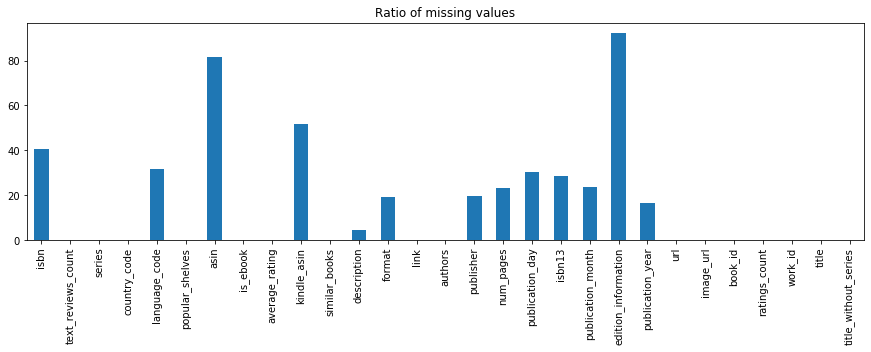

In [12]:
plt.figure(figsize=(15,4))
books.isna().sum().map(lambda x: (x / books.shape[0])* 100).plot(kind='bar',title = 'Ratio of missing values')

There is a significant number of missing values by columns 'edition_information' and 'asin', but these properties don't seem to be useful by our task anyway.

### Text review count

count     93398.000000
mean        101.913189
std        1159.965407
min           0.000000
25%           3.000000
50%           9.000000
75%          29.000000
max      142645.000000
Name: text_reviews_count, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 12626/93398 (0.13518490759973448%)
outliers lower: 0/93398 (0.0%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d8f66550>,
       dtype=object))

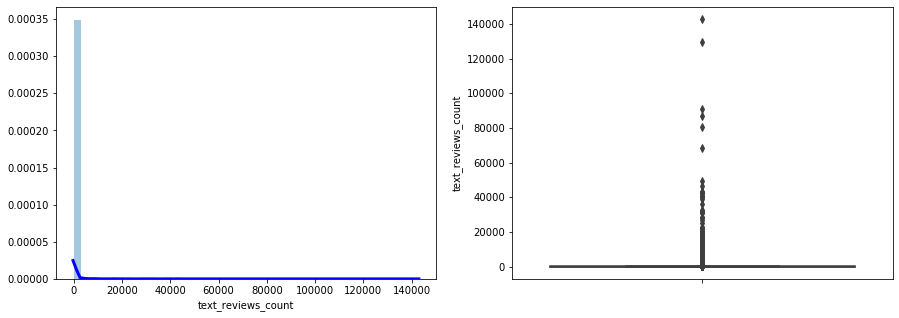

In [13]:
single_col.analyze_numeric(books, 'text_reviews_count')

There are huge differences between books, many of them are having number of reviews between 0-10 (more than half). And only the top 25% has at least 29 reviews.

### Rating count

count    9.339800e+04
mean     1.351242e+03
std      2.885759e+04
min      0.000000e+00
25%      1.500000e+01
50%      4.800000e+01
75%      1.840000e+02
max      4.899965e+06
Name: ratings_count, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 13871/93398 (0.14851495749373647%)
outliers lower: 0/93398 (0.0%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d8032160>,
       dtype=object))

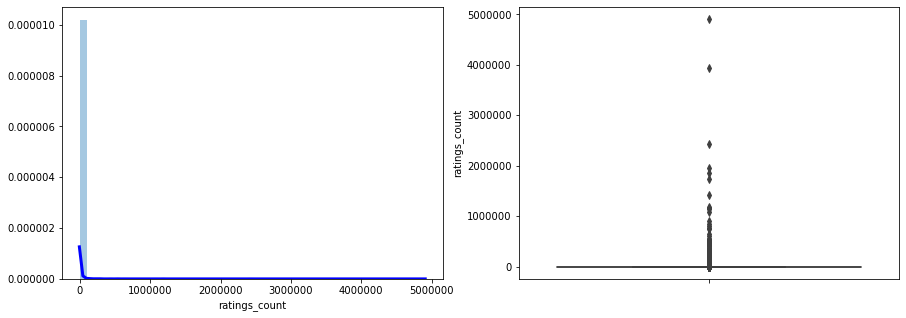

In [15]:
single_col.analyze_numeric(books, 'ratings_count')

Again - there are huge differences in the dataset. The half of the books have less than 48 ratings.

### Average rating

Even if it's more a categoric property, it's ordinal, so we can try to analyse it similarily like numberic atributes

count    93398.000000
mean         3.860503
std          0.345687
min          0.000000
25%          3.660000
50%          3.870000
75%          4.090000
max          5.000000
Name: average_rating, dtype: float64

missing values: 0/93398 (0.0%)
outliers upper: 366/93398 (0.003918713462815049%)
outliers lower: 1276/93398 (0.013661962782928971%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d7ecbdf0>,
       dtype=object))

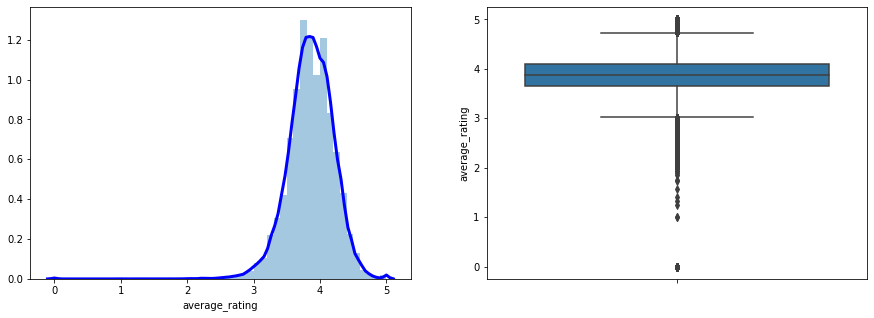

In [16]:
single_col.analyze_numeric(books, 'average_rating')

The distribution of values here is more like normal distribution with median and mean around 3,86.

### Is ebook

count     93398
unique        2
top       False
freq      65575
Name: is_ebook, dtype: object
Ratio of True: 0.29789717124563697%
Ratio of False: 0.702102828754363%


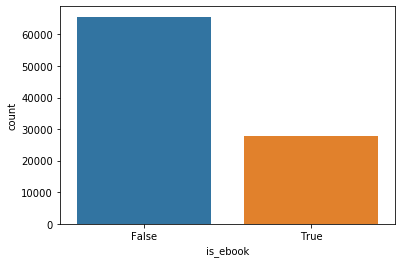

In [17]:
single_col.analyze_category(books,'is_ebook')

70% of books aren't e-books. In furhter analysis we will take a look at correlation between being an e-book and number of reviews

## Popular shelves

In [21]:
books.popular_shelves.describe().top

"[{'count': '51038', 'name': 'favorites'}, {'count': '36703', 'name': 'currently-reading'}, {'count': '33494', 'name': 'to-read'}, {'count': '26318', 'name': 'young-adult'}, {'count': '14025', 'name': 'fiction'}, {'count': '13168', 'name': 'dystopian'}, {'count': '11243', 'name': 'dystopia'}, {'count': '11000', 'name': 'fantasy'}, {'count': '10995', 'name': 'ya'}, {'count': '8926', 'name': 'science-fiction'}, {'count': '7245', 'name': 'books-i-own'}, {'count': '6345', 'name': 'sci-fi'}, {'count': '5094', 'name': 'series'}, {'count': '5069', 'name': 'owned'}, {'count': '4229', 'name': 'favourites'}, {'count': '3390', 'name': 'romance'}, {'count': '3200', 'name': 'adventure'}, {'count': '2911', 'name': 'hunger-games'}, {'count': '2017', 'name': 'book-club'}, {'count': '1999', 'name': 'kindle'}, {'count': '1779', 'name': 'teen'}, {'count': '1478', 'name': 'read-in-2012'}, {'count': '1465', 'name': 'post-apocalyptic'}, {'count': '1464', 'name': 'my-books'}, {'count': '1443', 'name': 'the-h

## Reviews

In [22]:
rev = pd.read_csv('../data/reviews.csv')

In [23]:
rev.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,24,25
1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,NaN,NaN,0,0
2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,0,0


In [24]:
rev.describe(include='all')

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
count,2389900,2.389900e+06,2389900,2.389900e+06,2388621,2389900,2389900,2041459,1579237,2.389900e+06,2.389900e+06
unique,209152,NaN,2389900,NaN,2296734,2371220,2340529,828792,88651,NaN,NaN
top,59151b639f247aa97fffd5c71701db29,NaN,1e5e0f68ce5ebe96268bb4d3852e081d,NaN,3.5,Sun Feb 01 00:00:00 -0800 2015,Sun Aug 04 08:29:24 -0700 2013,Fri Jan 01 00:00:00 -0800 2016,Fri Jan 01 00:00:00 -0800 2016,NaN,NaN
freq,2438,NaN,1,NaN,4284,34,37,5130,2274,NaN,NaN
mean,NaN,1.352580e+07,NaN,3.764296e+00,NaN,NaN,NaN,NaN,NaN,1.269322e+00,3.033106e-01
std,NaN,8.617060e+06,NaN,1.259770e+00,NaN,NaN,NaN,NaN,NaN,1.030308e+01,2.460205e+00
min,NaN,5.000000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,-3.000000e+00,-3.000000e+00
25%,NaN,7.238737e+06,NaN,3.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,NaN,1.298713e+07,NaN,4.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
75%,NaN,1.869243e+07,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00


In [26]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389900 entries, 0 to 2389899
Data columns (total 11 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   book_id       int64 
 2   review_id     object
 3   rating        int64 
 4   review_text   object
 5   date_added    object
 6   date_updated  object
 7   read_at       object
 8   started_at    object
 9   n_votes       int64 
 10  n_comments    int64 
dtypes: int64(4), object(7)
memory usage: 200.6+ MB


The interesting numberic columns:
- n_votes - this is the property, what we want to predict
- rating - how the user rated the book

The interesting columns, whose need preprocessing:
- review_text

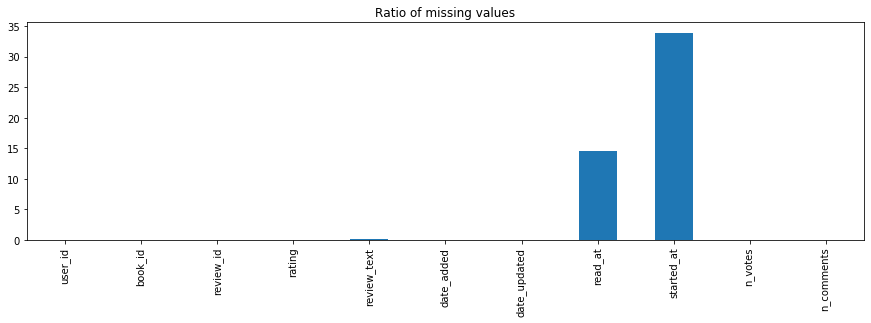

In [25]:
plt.figure(figsize=(15,4))
rev.isna().sum().map(lambda x: (x / rev.shape[0])* 100).plot(kind='bar',title = 'Ratio of missing values')

## rating

count    2.389900e+06
mean     3.764296e+00
std      1.259770e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
Ratio of 5: 33.5698564793506%
Ratio of 4: 32.80957362232729%
Ratio of 2: 7.327001129754383%
Ratio of 3: 19.91648186116574%
Ratio of 1: 2.938574835767187%
Ratio of 0: 3.4385120716347966%


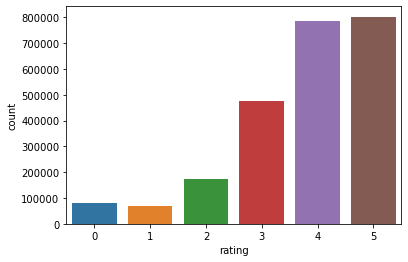

In [32]:
single_col.analyze_category(rev, 'rating')

# number of votes

count    2.389900e+06
mean     1.269322e+00
std      1.030308e+01
min     -3.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.942000e+03
Name: n_votes, dtype: float64

missing values: 0/2389900 (0.0%)
outliers upper: 210471/2389900 (8.806686472237333%)
outliers lower: 81/2389900 (0.003389263149085736%)



(<Figure size 1080x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8ccb2b2e0>,
       dtype=object))

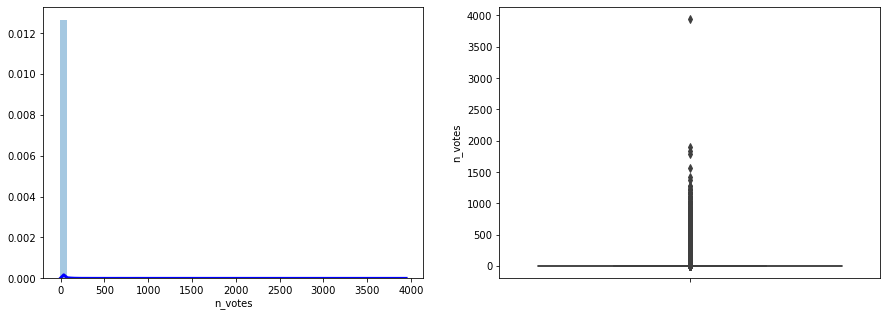

In [33]:
single_col.analyze_numeric(rev,'n_votes')

## Interactions

In [34]:
intr = pd.read_csv('../data/interactions.csv', nrows=100000)

In [35]:
intr.head(3)

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
0,8842281e1d1347389f2ab93d60773d4d,18667753,be53fe83a6fc83474052f84692f6e90a,False,0,NaN,Wed Mar 29 00:12:52 -0700 2017,Wed Mar 29 00:12:52 -0700 2017,NaN,NaN
1,8842281e1d1347389f2ab93d60773d4d,428263,2030f56879ebcc307a4b9cd8c83200e8,False,0,NaN,Mon Mar 27 22:01:42 -0700 2017,Mon Mar 27 22:01:42 -0700 2017,NaN,NaN
2,8842281e1d1347389f2ab93d60773d4d,11387515,2fd3cd1acb30b099c135e358669639da,False,0,NaN,Thu Jan 26 13:35:10 -0800 2017,Thu Jan 26 13:35:10 -0800 2017,NaN,NaN


In [36]:
intr.describe(include='all')

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
count,100000,1.000000e+05,100000,100000,100000.000000,7922,100000,100000,22055,17772
unique,1302,NaN,100000,2,NaN,7821,98934,98635,15447,10702
top,f8a89075dc6de14857561522e729f82c,NaN,5c394e8593ddfa2db1bcad40816e8296,False,NaN,This book is on the bibliography of books chal...,Fri Jun 08 12:48:05 -0700 2012,Mon Jul 01 01:03:41 -0700 2013,Fri Jan 01 00:00:00 -0800 2016,Sat Jun 03 00:00:00 -0700 2017
freq,2528,NaN,1,55082,NaN,26,12,34,130,29
mean,NaN,1.199138e+07,NaN,NaN,1.643070,NaN,NaN,NaN,NaN,NaN
std,NaN,8.973618e+06,NaN,NaN,2.022175,NaN,NaN,NaN,NaN,NaN
min,NaN,5.000000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.135798e+06,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.138430e+07,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.792690e+07,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


count     100000
unique         2
top        False
freq       55082
Name: is_read, dtype: object
Ratio of False: 55.082%
Ratio of True: 44.918%


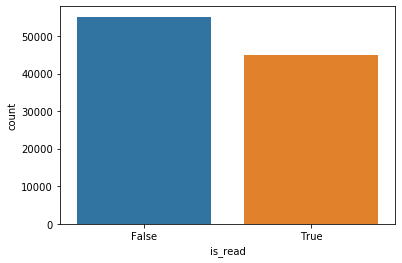

In [37]:
single_col.analyze_category(intr, 'is_read')

count    100000.000000
mean          1.643070
std           2.022175
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
Ratio of 0: 57.537%
Ratio of 3: 9.876%
Ratio of 2: 2.946%
Ratio of 5: 13.211%
Ratio of 4: 15.434%
Ratio of 1: 0.996%


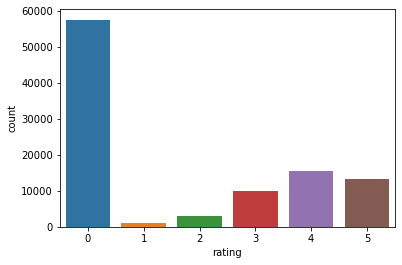

In [39]:
single_col.analyze_category(intr, 'rating')

0 indicates 'not provided'